# **Credit Card Fraud Detection**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection as ms
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [ ]:
df = pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# value 0 stands for non-fraudulent transactions 
# value 1 stands for fraudulent transactions
val = df['Class'].value_counts().tolist()
var = df['Class'].value_counts().index.tolist()
print("Values = ", var)
print("Counts =", val)

Values =  [0, 1]
Counts = [284315, 492]


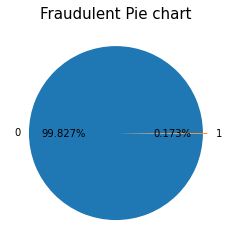

In [ ]:
plt.pie(val, labels= var, autopct="%1.3f%%", explode = (0.0,0.05))
plt.title("Fraudulent Pie chart", fontsize=15)
plt.figsize = (10, 10)
plt.show()

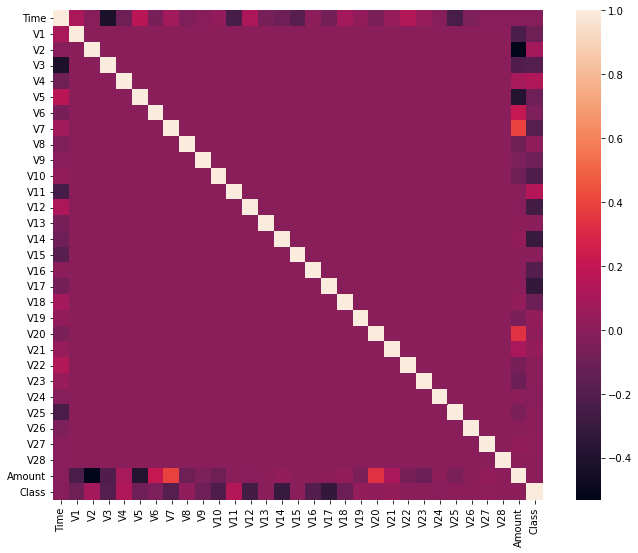

In [ ]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, square = True)
plt.show()

In [ ]:
non_fraud_transactions = df[df['Class'] == 0]
fraud_transactions = df[df['Class'] == 1]

In [ ]:
non_fraud_transactions[['Time', 'Amount']].describe()

,Time,Amount
count,284315.000000,284315.000000
mean,94838.202258,88.291022
std,47484.015786,250.105092
min,0.000000,0.000000
25%,54230.000000,5.650000
50%,84711.000000,22.000000
75%,139333.000000,77.050000
max,172792.000000,25691.160000


In [ ]:
fraud_transactions[['Time', 'Amount']].describe()

,Time,Amount
count,492.000000,492.000000
mean,80746.806911,122.211321
std,47835.365138,256.683288
min,406.000000,0.000000
25%,41241.500000,1.000000
50%,75568.500000,9.250000
75%,128483.000000,105.890000
max,170348.000000,2125.870000


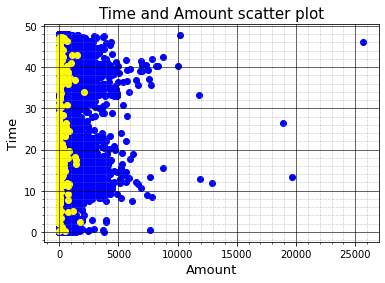

In [ ]:
# Converting time into hours from seconds
plt.scatter(non_fraud_transactions['Amount'], (non_fraud_transactions['Time']/(3600)), color='blue')
plt.scatter(fraud_transactions['Amount'], (fraud_transactions['Time']/(3600)), color='yellow')
plt.figsize = (10,15)
plt.title("Time and Amount scatter plot", fontsize=15)
plt.xlabel("Amount", fontsize=13)
plt.ylabel("Time", fontsize=13)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.6', color ='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color ='grey')
plt.show()

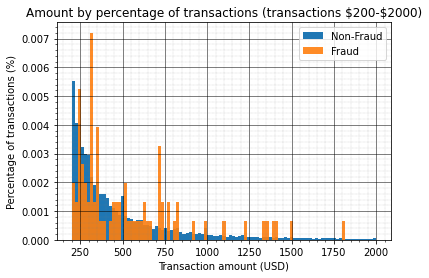

In [ ]:
bins = np.linspace(200, 2000, 100)
plt.hist(non_fraud_transactions['Amount'], bins, density=True, alpha=1, label='Non-Fraud')
plt.hist(fraud_transactions['Amount'], bins, density=True, alpha=0.9, label='Fraud')
plt.figsize = (70, 50)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color ='black')
plt.grid(which='minor', linestyle=':', linewidth='0.3', color ='grey')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

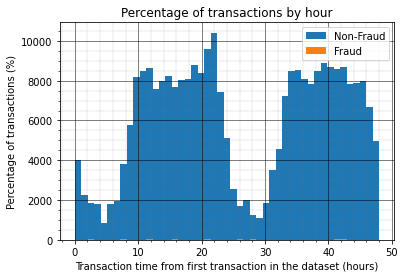

In [ ]:
bins = np.linspace(0, 48, 48)
plt.hist((non_fraud_transactions['Time']/(3600)), bins, alpha=1, label='Non-Fraud')
plt.hist((fraud_transactions['Time']/(3600)), bins, alpha=1, label='Fraud')
plt.figsize = (70, 50)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color ='black')
plt.grid(which='minor', linestyle=':', linewidth='0.4', color ='grey')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

Text(0, 0.5, 'Count')

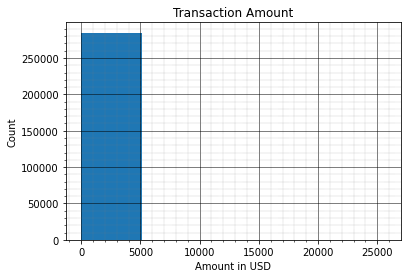

In [ ]:
plt.hist(df['Amount'],bins = 5)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color ='black')
plt.grid(which='minor', linestyle=':', linewidth='0.4', color ='grey')
plt.title('Transaction Amount')
plt.xlabel('Amount in USD') 
plt.ylabel('Count')

In [ ]:
X = df.drop(['Class'], axis=1)
Y = df['Class']

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False)
PWTR_X = pt.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = ms.train_test_split(X, Y, test_size = 0.25)
print(X_train.shape, X_test.shape)

(213605, 30) (71202, 30)


In [ ]:
def PrintEveluationParameters(actual_data, predicted_data):
    try:
        print("  Mean Squared Error:", mean_squared_error(actual_data, predicted_data))
        print("  r2 score:", r2_score(actual_data, predicted_data))
        print("  The accuracy is", accuracy_score(actual_data, predicted_data))
    except ValueError:
        pass

In [ ]:
lr = linear_model.LinearRegression()
lr_model = lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
logr = linear_model.LogisticRegression()
logr_model = logr.fit(X_train, Y_train)

In [ ]:
y_pred_logr = logr.predict(X_test)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred_rfc = rfc.predict(X_test)

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
y_pred_dtr = dtr.predict(X_test)

In [ ]:
print("Different Algorithms and Eveluation Parameters:")
print(" Linear Regressor:")
PrintEveluationParameters(Y_test, y_pred_lr)
print("\n Logistic Regressor:")
PrintEveluationParameters(Y_test, y_pred_logr)
print("\n Random Forest Classifier:")
PrintEveluationParameters(Y_test, y_pred_rfc)
print("\n Decision Tree Regressor:")
PrintEveluationParameters(Y_test, y_pred_dtr)

Different Algorithms and Eveluation Parameters:
 Linear Regressor:
  Mean Squared Error: 0.0008095865919582371
  r2 score: 0.5227908160836996

 Logistic Regressor:
  Mean Squared Error: 0.0007443611134518693
  r2 score: 0.5612378428474281
  The accuracy is 0.9992556388865481

 Random Forest Classifier:
  Mean Squared Error: 0.0004072919300019662
  r2 score: 0.7599225932561399
  The accuracy is 0.999592708069998

 Decision Tree Regressor:
  Mean Squared Error: 0.000870762057245583
  r2 score: 0.486731061444161
  The accuracy is 0.9991292379427544
